<a href="https://colab.research.google.com/github/jsebastianquiroga/Topicos_analitica/blob/main/Notebook/Social_Network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">



<h1> <strong>Tópicos avanzados en analítica.</strong></h1> 
<h2> Para: Luis Gabriel Moreno Sandoval.</br></h2>
<h2>Integrantes:</br></h2>
<h2>Alejandro Vivas.</br></h2>
<h2>Jhoan Sebastian Muñoz.</br></h2>
<h2>Juan Sebastián Quiroga Bernal. </h2>

**Este colab puede ser ejecutado por cualquier usuario sin necesidad de cargar los archivos al entorno, debido a que la conexión está configurada para acceder a los archivos desde la nube**.


<h1> <strong>Workshop 1: Power Laws and Graph.</strong></h1> 

Hemos hablado de leyes de potencia y redes aleatorias. Una de esas leyes de potencia se produce en relación con 
la topología de las redes naturales: La mayoría de los nodos tienen pocas conexiones, y pocos nodos tienen la mayoría de las 
conexiones. Estas estructuras de red tienen importantes consecuencias en la dinámica del 
sistema asociado: Redes de transporte, redes de comunicación, redes metabólicas, 
redes epidemiológicas, redes sociales, etc. Vamos a repasar algunos conceptos relacionados.

El presente notebook, estará dividido en divido en las siguientes partes:
<ol>
<li> Redes sintéticas:. </li>
<li> Redes Naturales. </li>
<li> Conclusiones.</li>
</ol>

***

# <h1><strong> 1. Redes sintéticas: </h1></strong>

Se construiran dos redes, se comenzara con dos nodos, y posteriormente se conecatará aleatoriamente con alguno de los existentes. </br>

<ol>
<li> Primera red: Elección mediante una distribución uniforme entre los nodos existentes.</li>
<li> Segunda red: Con base a las conexiones de cada nodo existente, se computa el grado de las dos distribuciones. </li>
<li> Comparación. </li> </ol>

## 1.1. Primera red: Elección mediante una distribución uniforme entre los nodos existentes.

In [21]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
!pip install networkx --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
#Se importan las Librerias a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import networkx as nx
import collections 

import statistics
import random
from random import randint



Nodos iniciales de la red Sitética: [1, 2]
Conexiones iniciales de la red Sitética: [(1, 2)]
------------------------------------------------------


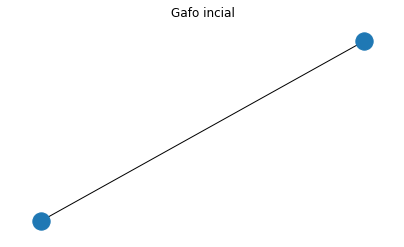

In [32]:
#Crear objeto grafo, con sus dos primeros nodos y conexiones.
G1 = nx.Graph()
G1.add_node(1)
G1.add_node(2)
G1.add_edge(1,2)

print('Nodos iniciales de la red Sitética:', G1.nodes)
print('Conexiones iniciales de la red Sitética:', G1.edges)
print('------------------------------------------------------')
#Generacion del grafo RANDOM

plt.figure(figsize=(7,4))
plt.title('Gafo incial')

nx.draw_circular(G1)

In [ ]:
!pip install --upgrade networkx

In [53]:
  #Se define una funcion que crea una red sintetica con una distribución uniforme
  #toma como entradas la cantidad de conexiones total que se quiere para red y el tamaño de sus nodos.
  def generate_random_graph(Edges, Nodes, inicial_nodes):

      # Se crea una matriz adjacente de 0 con dimenciones N x N
      A = np.zeros((Nodes, Nodes))

      # Conexión aleatoria
      for i in range(inicial_nodes, Edges, 1):

        # Elexion de los dos nodos inciales.
        for node in range(inicial_nodes):

          ini_node=randint(0,i-1)

          if i< Nodes:
            G1.add_node(i)
            G1.add_edge(i,ini_node)
          else:
            node1=randint(0,Nodes)
            node2=randint(0,Nodes)
            G1.add_edge(node1,node2)
            
      return G1

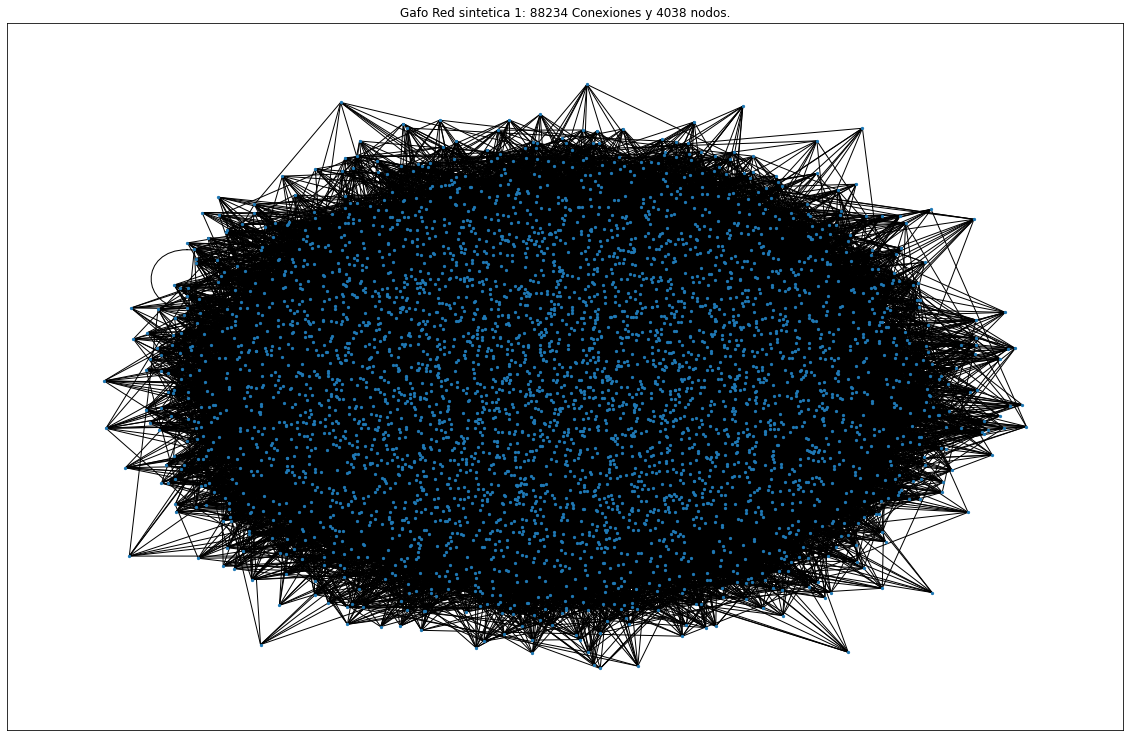

In [54]:
# Se crea un red GS1 con 88234 Conexiones y 4038 nodos.
GS1 = generate_random_graph(88234, 4038, 2)
plt.figure(figsize=(20,13))
plt.title('Gafo Red sintetica 1: 88234 Conexiones y 4038 nodos.')

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_size=5)
nx.draw_networkx_edges(G,pos, alpha=1)

In [97]:
print('Nodos iniciales de la red Sitética:', G.number_of_nodes())
print('Conexiones iniciales de la red Sitética:', G.number_of_edges())
print('------------------------------------------------------')

Nodos iniciales de la red Sitética: 4039
Conexiones iniciales de la red Sitética: 88234
------------------------------------------------------


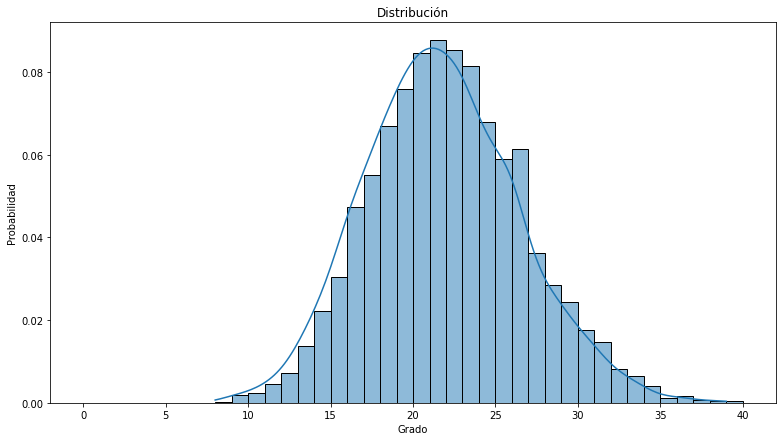

In [61]:
# Se calcula el grado de cada nodo.
degrees = dict(G.degree())
plt.figure(figsize=(13,7))
# histograma
sns.histplot(list(degrees.values()), bins=range(0, max(degrees.values())+2, 1), stat='density', kde=True)
plt.title("Distribución")
plt.xlabel("Grado")
plt.ylabel("Probabilidad")


#ver
plt.show()

## 2.1.Segunda red: Con base a las conexiones de cada nodo existente, se computa el grado de las dos distribuciones.##

In [94]:
def generate_scale_free_graph(n_edges, n_nodes):
    # Initialize the graph with two nodes and an edge between them
    G = nx.Graph()
    G.add_node(1)
    G.add_node(2)
    G.add_edge(1, 2)

    # Initialize the degrees of the first two nodes
    degrees = {1: 1, 2: 1}

    # Add nodes and edges to the graph
    for i in range(2, n_nodes):
        # Choose a node to connect to
        new_node = i + 1

        # Select a node to connect with, with probability proportional to its degree
        total_degree = sum(degrees.values())
        probabilities = [degree / total_degree for degree in degrees.values()]
        connected_node = np.random.choice(list(degrees.keys()), p=probabilities)

        # Add the new node and edge
        G.add_node(new_node)
        G.add_edge(new_node, connected_node)

        # Update the degrees of the connected nodes
        degrees[connected_node] += 1
        degrees[new_node] = 1

    # Add edges until the desired number of edges is reached
    while G.number_of_edges() < n_edges:
        # Choose two nodes to connect
        node1, node2 = np.random.choice(list(G.nodes()), size=2, replace=False)

        # Add the edge if it doesn't exist already
        if not G.has_edge(node1, node2):
            G.add_edge(node1, node2)

            # Update the degrees of the connected nodes
            degrees[node1] += 1
            degrees[node2] += 1

    return G

In [ ]:
Gs2 = generate_scale_free_graph(n_edges=88234, n_nodes=4039)

In [92]:
F.number_of_edges()

88234

In [93]:
F.number_of_nodes()

4039

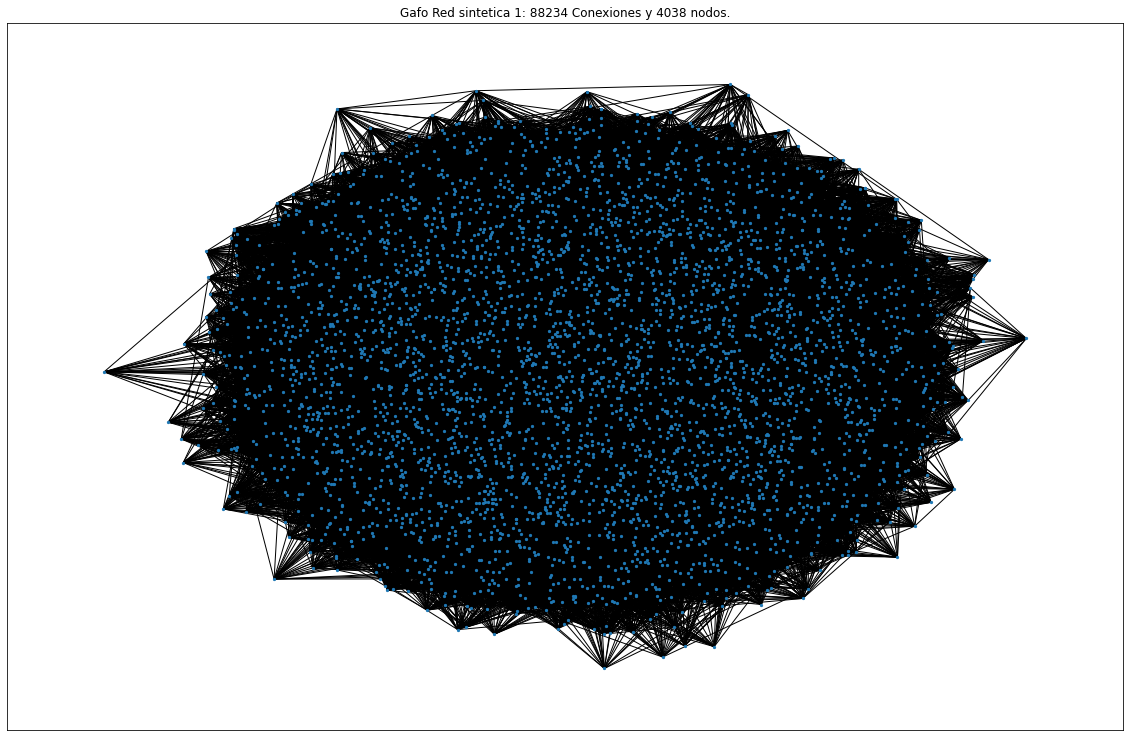

In [91]:
plt.figure(figsize=(20,13))
plt.title('Gafo Red sintetica 2: 88234 Conexiones y 4038 nodos.')

pos = nx.spring_layout(F)
nx.draw_networkx_nodes(F,pos,node_size=5)
nx.draw_networkx_edges(F,pos, alpha=1)

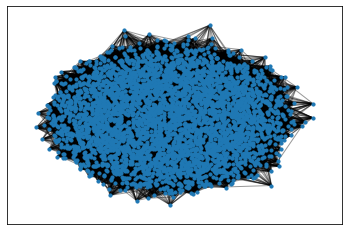

In [85]:
#GRAFICO DISTRIBUCION SCALE FREE
pos = nx.spring_layout(F, seed=10396953)
nx.draw_networkx_nodes(F,pos,node_size=10)
nx.draw_networkx_edges(F,pos, alpha=0.4)

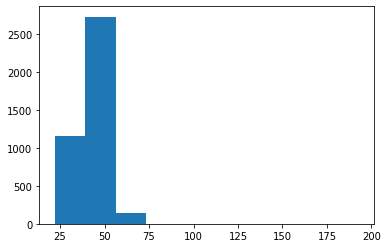

In [89]:
#DEFINICION GRAFICO DE DISTRIBUCION
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()
plot_degree_dist(F)

##

In [ ]:
#LECTURA NODOS Y EDGES FACEBOOK
fb = pd.read_csv(r'Workshop 1_facebookNetwork.txt',sep=' ')
fb.head()

In [ ]:
#GENERACION GRAFO FACEBOOK
H = nx.Graph()
fb_list = fb.values.tolist()
H.add_edges_from(fb_list)
print(nx.info(H))
plt.figure(figsize=(18,12))
nx.draw_circular(H)

In [ ]:
#DISTRIBUCION GRAFO FACEBOOK
plot_degree_dist(H)

In [ ]:

# Conexion a gdrive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
import pandas as pd
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

nyra_2019_complete = '1AAshxhslPjhxg-UC86f9Z97s3W81nayF' #<-- Key del file en drive (nyra_2019_complete.csv 610 mb)
# nyra_race_table    = '1KtYQEvt4pboSqs7bO6jfdCHADo9PMzo9'#<-- Key del file en drive (nyra_race_table.csv 93 kb)
# nyra_start_table   = '1LYUx_De3U7TBw6GgqRk6whVzMjuJjSaz'#<-- Key del file en drive (nyra_start_table.csv 722 Kb)
# nyra_tracking_table= '15y4AtfLiyop9FWdc0SRaMUs-jKgnOppl'#<-- Key del file en drive (nyra_tracking_table.csv 320,7 mb)
             }
nyra_2019 = pd.read_csv('nyra_2019_complete.csv', header=None,dtype=dtype_dict,parse_dates=[1])
nyra_2019.columns= dtype_dict.keys()
nyra_2019_nn = nyra_2019.copy()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
